In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.4 MB/s eta 0:00:00


In [2]:
import os
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
yolo_dir = '/content/drive/MyDrive/TEETH_SEG'

In [6]:
# Проверяем наличие изображений и разметок
def check_dataset_structure(base_path):
    print("Проверка структуры данных:")

    # Проверяем папки
    folders_to_check = ['/content/drive/MyDrive/TEETH_SEG/test/images', '/content/drive/MyDrive/TEETH_SEG/train/images', '/content/drive/MyDrive/TEETH_SEG/valid/images',
                       '/content/drive/MyDrive/TEETH_SEG/test/labels', '/content/drive/MyDrive/TEETH_SEG/train/labels', '/content/drive/MyDrive/TEETH_SEG/valid/labels']

    for folder in folders_to_check:
        full_path = os.path.join(base_path, folder)
        if os.path.exists(full_path):
            num_files = len(os.listdir(full_path))
            print(f"✓ {folder}: {num_files} файлов")
        else:
            print(f"✗ {folder}: не найдена")

# Проверяем основную папку YOLO
if os.path.exists(yolo_dir):
    check_dataset_structure(yolo_dir)

Проверка структуры данных:
✓ /content/drive/MyDrive/TEETH_SEG/test/images: 264 файлов
✓ /content/drive/MyDrive/TEETH_SEG/train/images: 1320 файлов
✓ /content/drive/MyDrive/TEETH_SEG/valid/images: 406 файлов
✓ /content/drive/MyDrive/TEETH_SEG/test/labels: 264 файлов
✓ /content/drive/MyDrive/TEETH_SEG/train/labels: 1320 файлов
✓ /content/drive/MyDrive/TEETH_SEG/valid/labels: 406 файлов


In [11]:
# Загрузка модели YOLO11 для сегментации
model = YOLO('yolo12n-seg.yaml')

results = model.train(
    data='/content/dataset.yaml',
    epochs=65,
    imgsz=640,
    batch=16,
    device=0,
    patience=20,
    #save=True,
    exist_ok=True,
    project='/content/teeth-segmentation_HW2',
    name='yolo12n_seg_exp',
    verbose=True
)

Ultralytics 8.3.217 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=65, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo12n-seg.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolo12n_seg_exp, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=20, perspective=0.0, plots=True, po

In [12]:
def quick_test(model_path, image_path):

    # Загрузка модели
    model = YOLO(model_path)

    # Предсказание
    results = model(image_path)

    # Визуализация
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Исходное изображение
    ax1.imshow(plt.imread(image_path))
    ax1.set_title('Исходное изображение')
    ax1.axis('off')

    # Результат
    ax2.imshow(results[0].plot()[..., ::-1])  # Конвертация BGR to RGB
    ax2.set_title('Результат сегментации')
    ax2.axis('off')

    plt.tight_layout()
    plt.show()

    return results


image 1/1 /content/drive/MyDrive/TEETH_SEG/train/images/25adc204-EBRAHIMI_MARZIE_2020-07-12202619_jpg.rf.98cf418c65fcbf907a20f4f1b242dc38.jpg: 352x640 2 Fillings, 2 Root Canal Treatments, 2 impacted tooths, 16.0ms
Speed: 2.0ms preprocess, 16.0ms inference, 2.7ms postprocess per image at shape (1, 3, 352, 640)


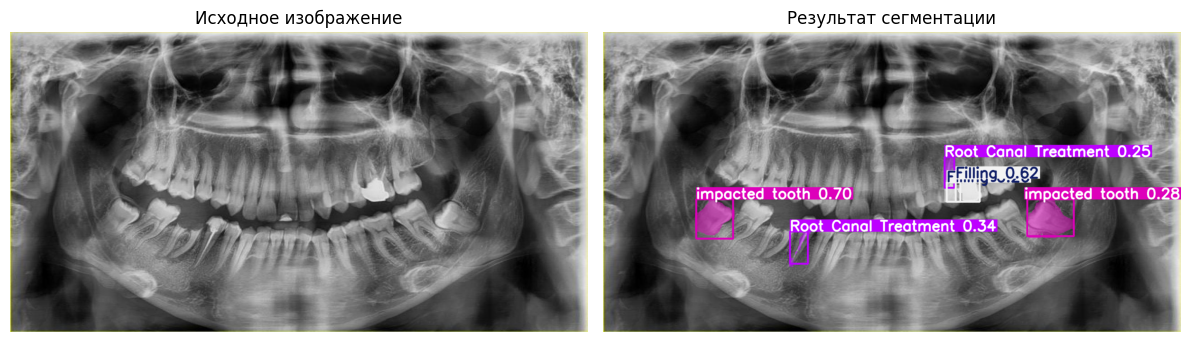

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: ultralytics.engine.results.Masks object
 names: {0: 'Caries', 1: 'Crown', 2: 'Filling', 3: 'Implant', 4: 'Malaligned', 5: 'Mandibular Canal', 6: 'Missing teeth', 7: 'Periapical lesion', 8: 'Retained root', 9: 'Root Canal Treatment', 10: 'Root Piece', 11: 'impacted tooth', 12: 'maxillary sinus', 13: 'Bone Loss', 14: 'Fracture teeth', 15: 'Permanent Teeth', 16: 'Supra Eruption', 17: 'TAD', 18: 'abutment', 19: 'attrition', 20: 'bone defect', 21: 'gingival former', 22: 'metal band', 23: 'orthodontic brackets', 24: 'permanent retainer', 25: 'post - core', 26: 'plating', 27: 'wire', 28: 'Cyst', 29: 'Root resorption', 30: 'Primary teeth'}
 obb: None
 orig_img: array([[[ 64, 253, 252],
         [ 66, 250, 250],
         [ 67, 246, 245],
         ...,
         [ 96, 240, 245],
         [ 96, 240, 245],
         [ 94, 240, 246]],
 
        [[ 67, 246, 245],
     

In [22]:
quick_test('/content/teeth-segmentation_HW2/yolo12n_seg_exp/weights/best.pt',
           '/content/drive/MyDrive/TEETH_SEG/train/images/25adc204-EBRAHIMI_MARZIE_2020-07-12202619_jpg.rf.98cf418c65fcbf907a20f4f1b242dc38.jpg')